In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For clarity, we extarct the path and file name
DATASET_PATH = 'DATA/'
FILE1 = 'dataset.csv'

In [3]:
# We store all the excel data in a variable called dataset
data_path_1 = os.path.join(DATASET_PATH, FILE1)
diabetes = pd.read_csv(data_path_1)
print(diabetes.columns)

Index([u'SEQN', u'BMXWT', u'BMXHT', u'BMXBMI', u'BMXWAIST', u'BPQ020',
       u'RIDAGEYR', u'RIDRETH3', u'MCQ300C', u'PAQ665', u'LBXTC', u'OUTCOME'],
      dtype='object')


In [4]:
print('The shape of the first dataset is: ', diabetes.shape)


('The shape of the first dataset is: ', (5368, 12))


In [5]:
diabetes.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,RIDAGEYR,RIDRETH3,MCQ300C,PAQ665,LBXTC,OUTCOME
0,73559,88.9,175.3,28.9,109.2,1,72,3,2,1,126,1
1,73564,93.4,161.8,35.7,110.8,1,61,3,2,2,168,0
2,73568,47.1,152.5,20.3,73.7,2,26,3,2,1,168,0
3,73574,56.8,158.0,22.8,78.7,2,33,6,1,1,131,0
4,73577,79.7,166.2,28.9,100.0,2,32,1,1,2,182,0


In [6]:
print(diabetes.groupby('OUTCOME').size())


OUTCOME
0    3808
1    1560
dtype: int64


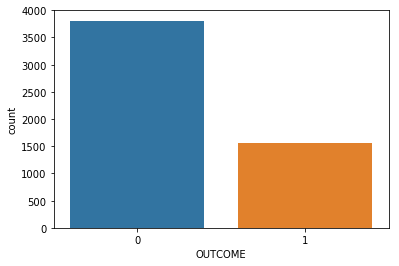

In [7]:
import seaborn as sns
sns.countplot(diabetes['OUTCOME'],label="Count")


In [8]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
SEQN        5368 non-null int64
BMXWT       5368 non-null float64
BMXHT       5368 non-null float64
BMXBMI      5368 non-null float64
BMXWAIST    5368 non-null float64
BPQ020      5368 non-null int64
RIDAGEYR    5368 non-null int64
RIDRETH3    5368 non-null int64
MCQ300C     5368 non-null int64
PAQ665      5368 non-null int64
LBXTC       5368 non-null int64
OUTCOME     5368 non-null int64
dtypes: float64(4), int64(8)
memory usage: 503.3 KB


In [8]:
# train/test

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [12]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'OUTCOME'], diabetes['OUTCOME'], stratify=diabetes['OUTCOME'], random_state=42)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

        SEQN  BMXWT  BMXHT  BMXBMI  BMXWAIST  BPQ020  RIDAGEYR  RIDRETH3  \
3601   89035   61.0  159.9    23.9      90.4       2        80         1   
3392   88097   93.8  167.9    33.3     107.4       2        75         3   
2330   83542   90.9  160.9    35.1     110.3       1        71         4   
4019   90929   86.9  156.3    35.6     115.6       1        65         7   
2247   83153   52.8  168.7    18.6      68.0       2        20         6   
2670   84978   50.4  151.9    21.8      84.6       2        60         2   
1222   78929   68.6  157.6    27.6      98.5       1        71         1   
3495   88575  101.3  182.8    30.3     103.2       2        48         3   
4735   94885  121.9  182.2    36.7     130.3       1        64         4   
177    74310   65.1  152.9    27.8      92.0       2        60         6   
4843   96124   67.3  156.5    27.5     101.2       2        52         6   
1206   78872   73.9  150.9    32.5     108.0       2        28         1   
4980   97752

In [11]:
diabetes.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPQ020,RIDAGEYR,RIDRETH3,MCQ300C,PAQ665,LBXTC,OUTCOME
0,73559,88.9,175.3,28.9,109.2,1,72,3,2,1,126,1
1,73564,93.4,161.8,35.7,110.8,1,61,3,2,2,168,0
2,73568,47.1,152.5,20.3,73.7,2,26,3,2,1,168,0
3,73574,56.8,158.0,22.8,78.7,2,33,6,1,1,131,0
4,73577,79.7,166.2,28.9,100.0,2,32,1,1,2,182,0


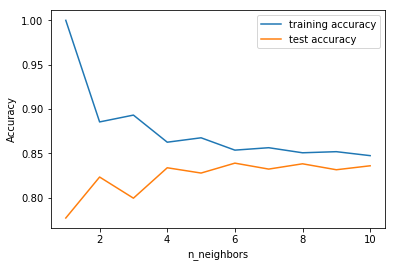

In [12]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# plot    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [64]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

import numpy as np
test = knn.predict(X_test)
print(test)
print(np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.84
[0 0 1 ... 0 0 1]
[0 0 1 ... 0 1 1]
[[941  11]
 [205 185]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       952
           1       0.94      0.47      0.63       390

   micro avg       0.84      0.84      0.84      1342
   macro avg       0.88      0.73      0.76      1342
weighted avg       0.86      0.84      0.82      1342



In [14]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.809
Test set score: 0.810


c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.809
Test set accuracy: 0.810


In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.809
Test set accuracy: 0.810


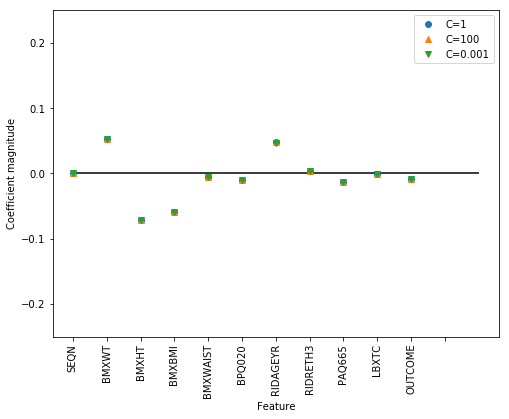

In [17]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-0.25, 0.25)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

import numpy as np
test = svc.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 1.00
Accuracy on test set: 0.71
('Predicted:', array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[952   0]
 [390   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       952
           1       0.00      0.00      0.00       390

   micro avg       0.71      0.71      0.71      1342
   macro avg       0.35      0.50      0.41      1342
weighted avg       0.50      0.71      0.59      1342



In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

import numpy as np
test = svc.predict(X_test_scaled)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.83
Accuracy on test set: 0.80
('Predicted:', array([1, 0, 1, ..., 0, 0, 1], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[821 131]
 [131 259]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       952
           1       0.66      0.66      0.66       390

   micro avg       0.80      0.80      0.80      1342
   macro avg       0.76      0.76      0.76      1342
weighted avg       0.80      0.80      0.80      1342



In [79]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

import numpy as np
test = svc.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.982
Accuracy on test set: 0.771
('Predicted:', array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[952   0]
 [390   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       952
           1       0.00      0.00      0.00       390

   micro avg       0.71      0.71      0.71      1342
   macro avg       0.35      0.50      0.41      1342
weighted avg       0.50      0.71      0.59      1342



In [21]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

c:\python27\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training set: 0.29
Accuracy on test set: 0.29


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
linearsvc = LinearSVC()
linearsvc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(linearsvc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(linearsvc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.83
Accuracy on test set: 0.78


In [23]:
linearsvc = LinearSVC(C=1000)
linearsvc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    linearsvc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(linearsvc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.757
Accuracy on test set: 0.706


In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.842


In [87]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

import numpy as np
test = rf1.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.850
Accuracy on test set: 0.846
('Predicted:', array([0, 0, 1, ..., 0, 0, 1], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[948   4]
 [203 187]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       952
           1       0.98      0.48      0.64       390

   micro avg       0.85      0.85      0.85      1342
   macro avg       0.90      0.74      0.77      1342
weighted avg       0.87      0.85      0.83      1342



In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


In [59]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

import numpy as np
test = tree.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.846
Accuracy on test set: 0.840
[0 0 1 ... 0 0 1]
[0 0 1 ... 0 1 1]
[[952   0]
 [215 175]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       952
           1       1.00      0.45      0.62       390

   micro avg       0.84      0.84      0.84      1342
   macro avg       0.91      0.72      0.76      1342
weighted avg       0.87      0.84      0.82      1342



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

import numpy as np
test = gb.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.884
Accuracy on test set: 0.850
[1 0 1 ... 0 0 1]
[0 0 1 ... 0 1 1]
[[907  45]
 [156 234]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       952
           1       0.84      0.60      0.70       390

   micro avg       0.85      0.85      0.85      1342
   macro avg       0.85      0.78      0.80      1342
weighted avg       0.85      0.85      0.84      1342



In [83]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.852


In [30]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.846
Accuracy on test set: 0.840


In [73]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.71
Accuracy on test set: 0.71


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.843


In [33]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.907
Accuracy on test set: 0.842


In [84]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

import numpy as np
test = mlp.predict(X_test_scaled)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.820
Accuracy on test set: 0.811
('Predicted:', array([1, 0, 1, ..., 1, 0, 1], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[842 110]
 [144 246]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       952
           1       0.69      0.63      0.66       390

   micro avg       0.81      0.81      0.81      1342
   macro avg       0.77      0.76      0.76      1342
weighted avg       0.81      0.81      0.81      1342



In [76]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

import numpy as np
test = clf.predict(X_test)
print("Predicted:", test)
print("Actual   :", np.array(y_test))

from sklearn import metrics
print(metrics.confusion_matrix(np.array(y_test), test, labels=[0, 1]))
print(metrics.classification_report(np.array(y_test), test, labels=[0, 1]))

Accuracy on training set: 0.818
Accuracy on test set: 0.794
('Predicted:', array([1, 0, 1, ..., 1, 0, 0], dtype=int64))
('Actual   :', array([0, 0, 1, ..., 0, 1, 1], dtype=int64))
[[832 120]
 [157 233]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       952
           1       0.66      0.60      0.63       390

   micro avg       0.79      0.79      0.79      1342
   macro avg       0.75      0.74      0.74      1342
weighted avg       0.79      0.79      0.79      1342

